In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
from dash import Dash, dcc, html, Input, Output
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline


In [3]:
#Read dataset
sd = pd.read_csv('suicide.csv')
sd

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
sd.head(11)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [5]:
sd.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
sd.describe(include=object)

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Mauritius,male,15-24 years,Albania1987,"2,156,624,900",Generation X
freq,382,13910,4642,12,12,6408


In [7]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
sd.isnull

<bound method DataFrame.isnull of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0           

In [9]:
sd.country.value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [10]:
sd.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [11]:
#Listing countries
country = sd.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [12]:
count1 = len(sd.loc[sd['suicides_no'].between(np.percentile(sd.suicides_no,0),
                                                     np.percentile(sd.suicides_no,99))])
count2 = len(sd.loc[sd['suicides_no'].between(np.percentile(sd.suicides_no,99),
                                                     np.percentile(sd.suicides_no,100))])
print("Suicide Numbers between 0 and 99 percentile :",count1)
print("Suicide Numbers between 99 and 100 percentile :",count2)

Suicide Numbers between 0 and 99 percentile : 27541
Suicide Numbers between 99 and 100 percentile : 279


In [13]:
#Numerical variables
sd.select_dtypes(exclude=[object])

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1987,21,312900,6.71,NaN,796
1,1987,16,308000,5.19,NaN,796
2,1987,14,289700,4.83,NaN,796
3,1987,1,21800,4.59,NaN,796
4,1987,9,274300,3.28,NaN,796
...,...,...,...,...,...,...
27815,2014,107,3620833,2.96,0.675,2309
27816,2014,9,348465,2.58,0.675,2309
27817,2014,60,2762158,2.17,0.675,2309
27818,2014,44,2631600,1.67,0.675,2309


In [14]:
#Categorical variables
sd.select_dtypes(include=[object])

,country,sex,age,country-year,gdp_for_year ($),generation
0,Albania,male,15-24 years,Albania1987,"2,156,624,900",Generation X
1,Albania,male,35-54 years,Albania1987,"2,156,624,900",Silent
2,Albania,female,15-24 years,Albania1987,"2,156,624,900",Generation X
3,Albania,male,75+ years,Albania1987,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,Albania1987,"2,156,624,900",Boomers
...,...,...,...,...,...,...
27815,Uzbekistan,female,35-54 years,Uzbekistan2014,"63,067,077,179",Generation X
27816,Uzbekistan,female,75+ years,Uzbekistan2014,"63,067,077,179",Silent
27817,Uzbekistan,male,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z
27818,Uzbekistan,female,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z


In [15]:
##checking the data for unique values
sd.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

In [16]:
#checking the data for null or missing values
sd.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

# Orignal data

C:\Users\bienail\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bienail\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


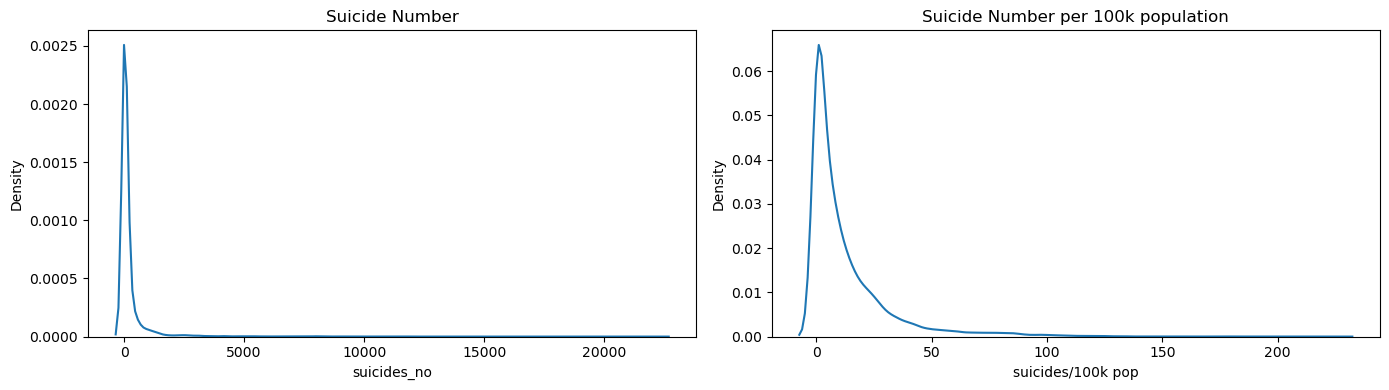

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.title('Suicide Number')
sns.distplot(sd['suicides_no'], hist=False)

plt.subplot(122)
plt.title('Suicide Number per 100k population')
sns.distplot(sd['suicides/100k pop'], hist=False)
plt.tight_layout()

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'suicides_no'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'suicides/100k pop'}>],
       [<AxesSubplot:title={'center':'HDI for year'}>,
        <AxesSubplot:title={'center':'gdp_per_capita ($)'}>]],
      dtype=object)

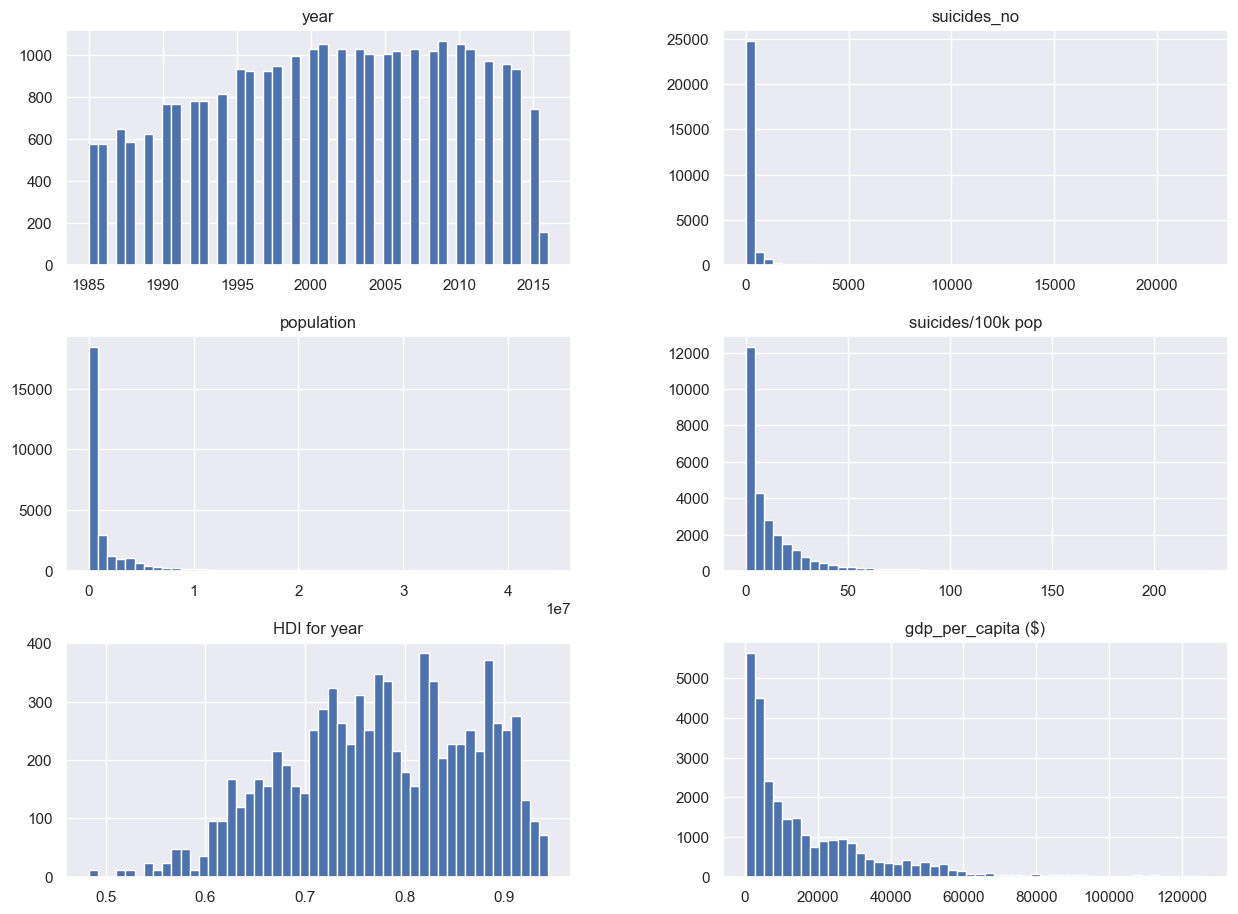

In [175]:
sd.hist(bins = 50,figsize = (15,11))

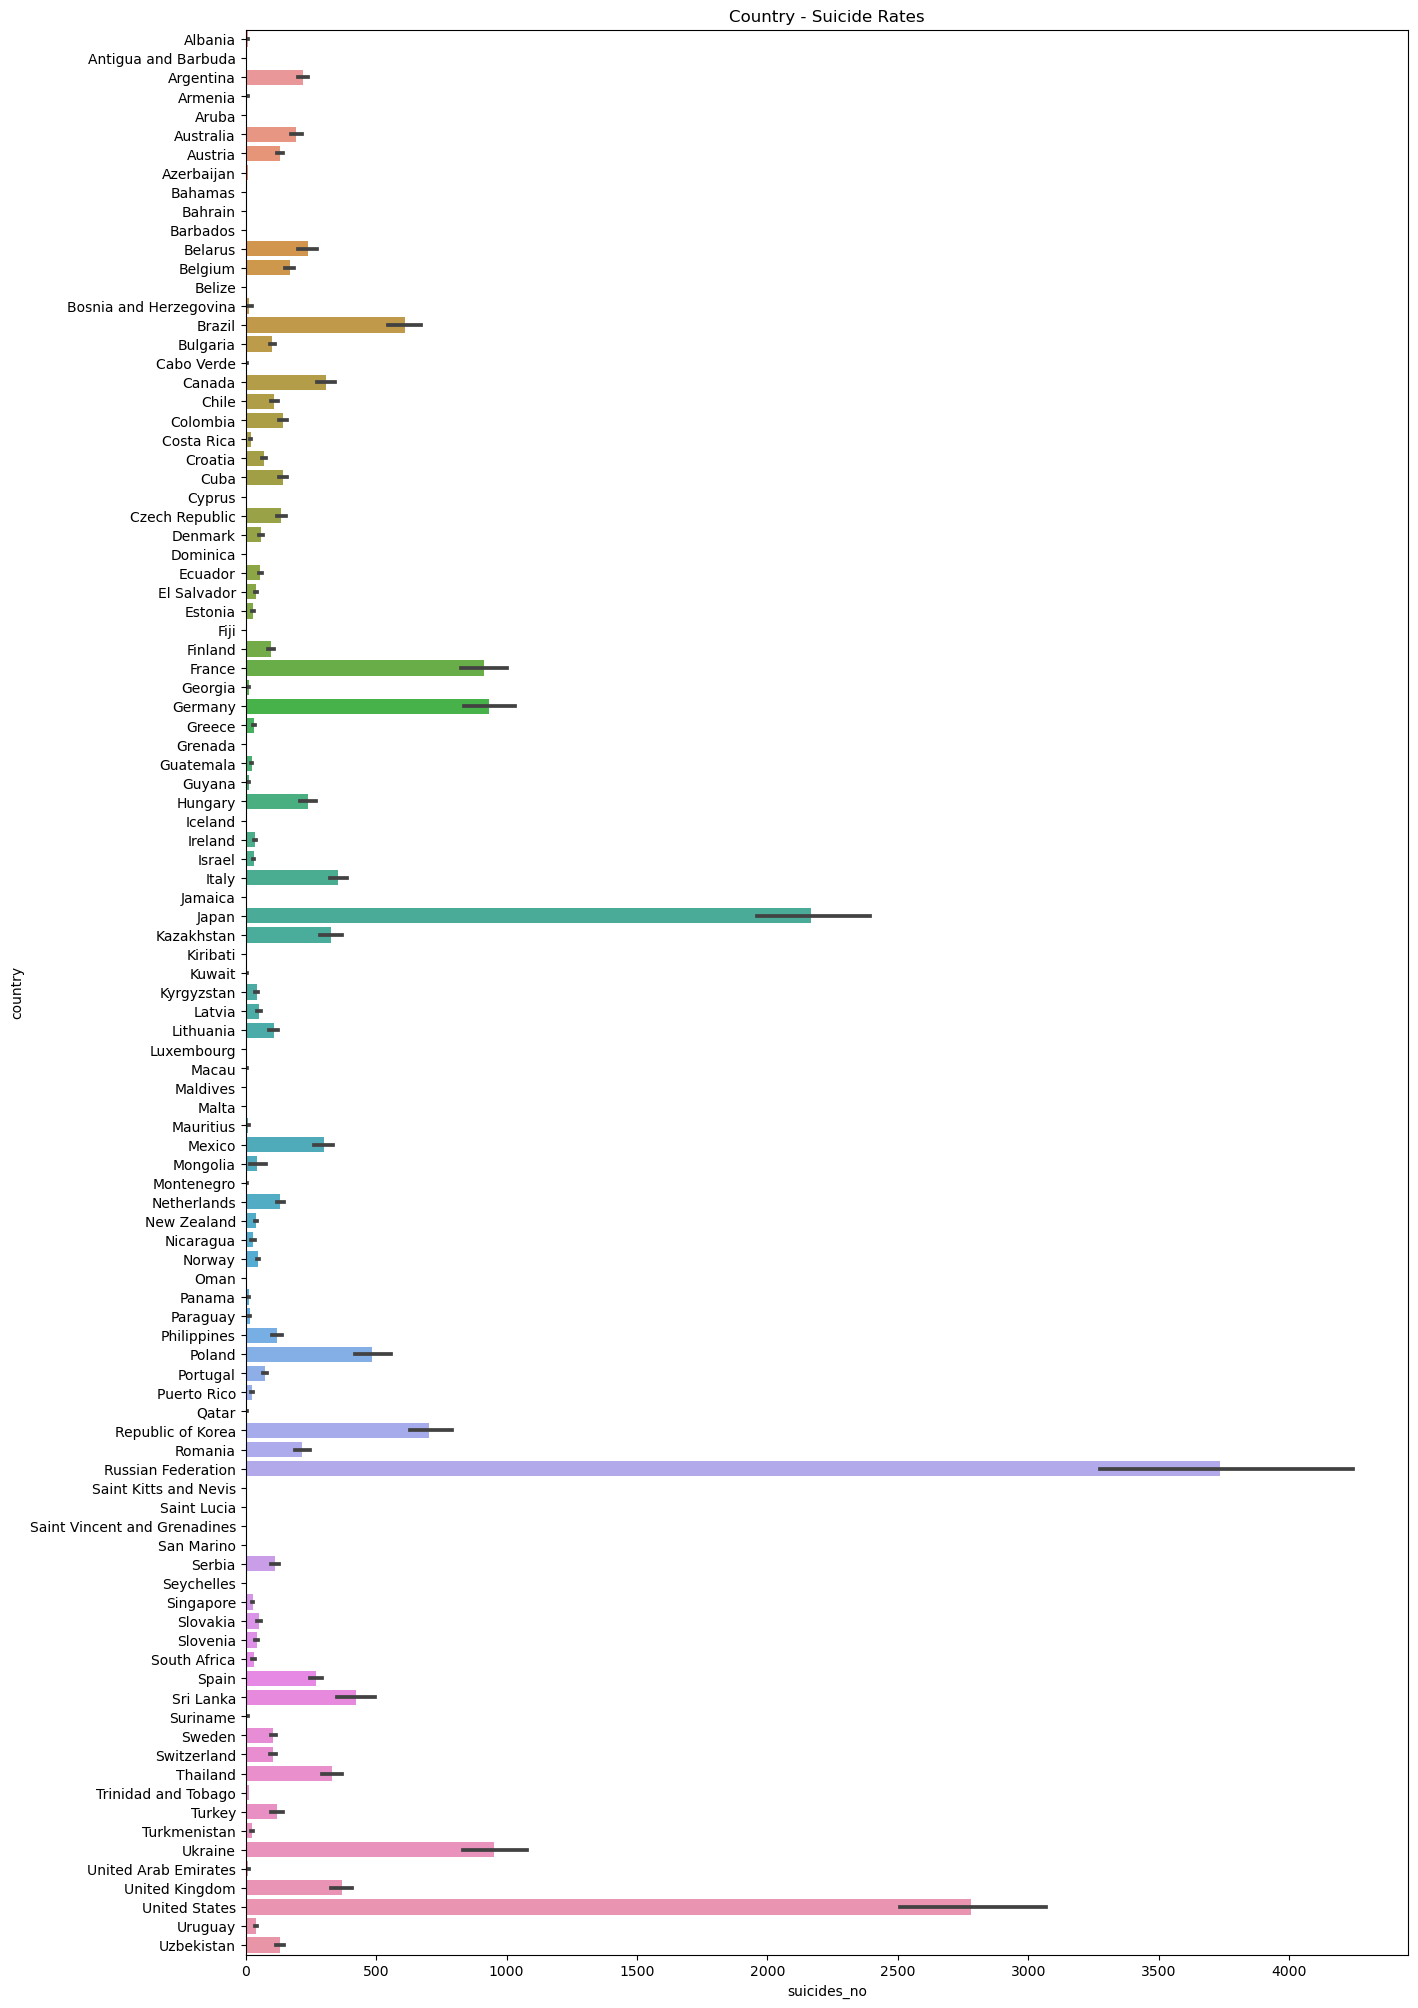

In [21]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicides_no", y = "country", data = sd)
plt.title('Country - Suicide Rates')
plt.show()

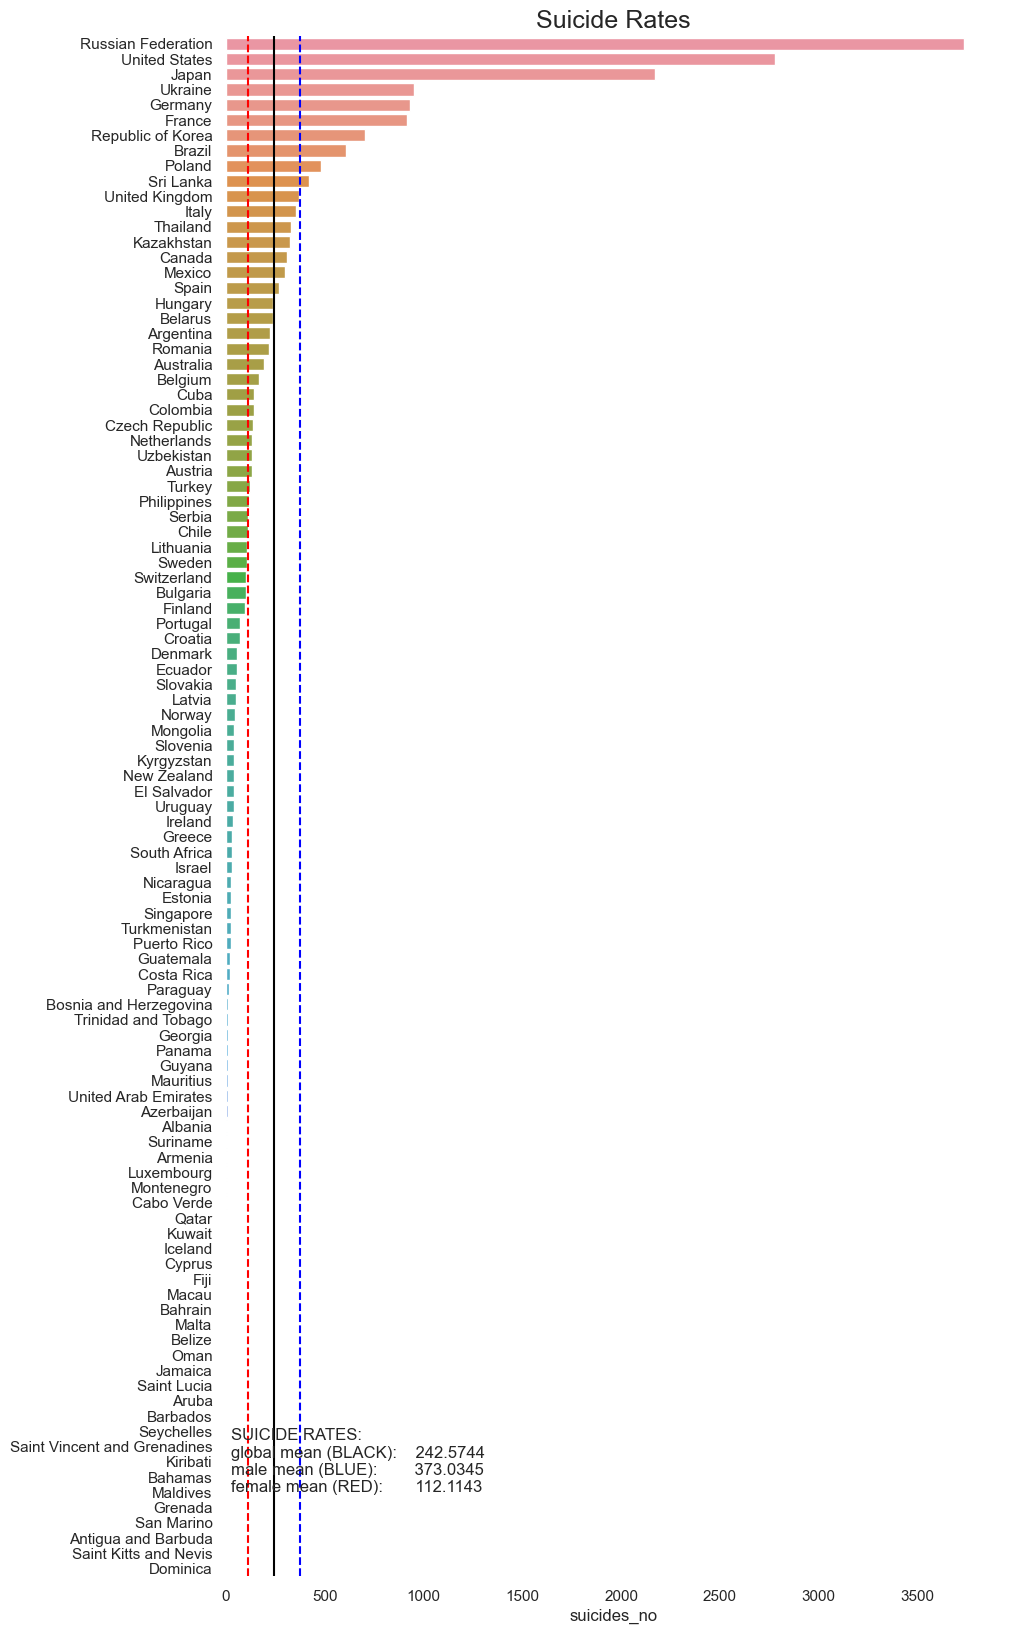

In [305]:

#  suicide rate average: overall, male, female
suicide_mean = sd['suicides_no'].mean()
sr_m = sd['suicides_no'][sd['sex'] == 'male'].mean()
sr_f = sd['suicides_no'][sd['sex'] == 'female'].mean()

#  dataframe with suicide averages for each country
df_suicideRate = sd['suicides_no'].groupby(sd['country']).mean().sort_values(ascending=False).reset_index()


#  plot suicide rates per country
plt.figure(figsize=(10,20))
ax = sns.barplot(data = df_suicideRate, x = 'suicides_no', y='country')
plt.title('Suicide Rates', fontsize=18)

plt.axvline(x= suicide_mean, color = 'black')#, ls = '--')
plt.axvline(x= sr_m, color = 'blue', ls = '--')
plt.axvline(x= sr_f, color = 'red', ls = '--')
plt.text(27,95,'SUICIDE RATES:\nglobal mean (BLACK):  {:>10.4f}\nmale mean (BLUE): {:>15.4f}\nfemale mean (RED): {:>14.4f}'.format(suicide_mean, sr_m, sr_f))

plt.ylabel("")
plt.box(False)

#for p in ax.patches:
   # ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width() +2, p.get_y()+.4), ha='center', va='center')

plt.show()

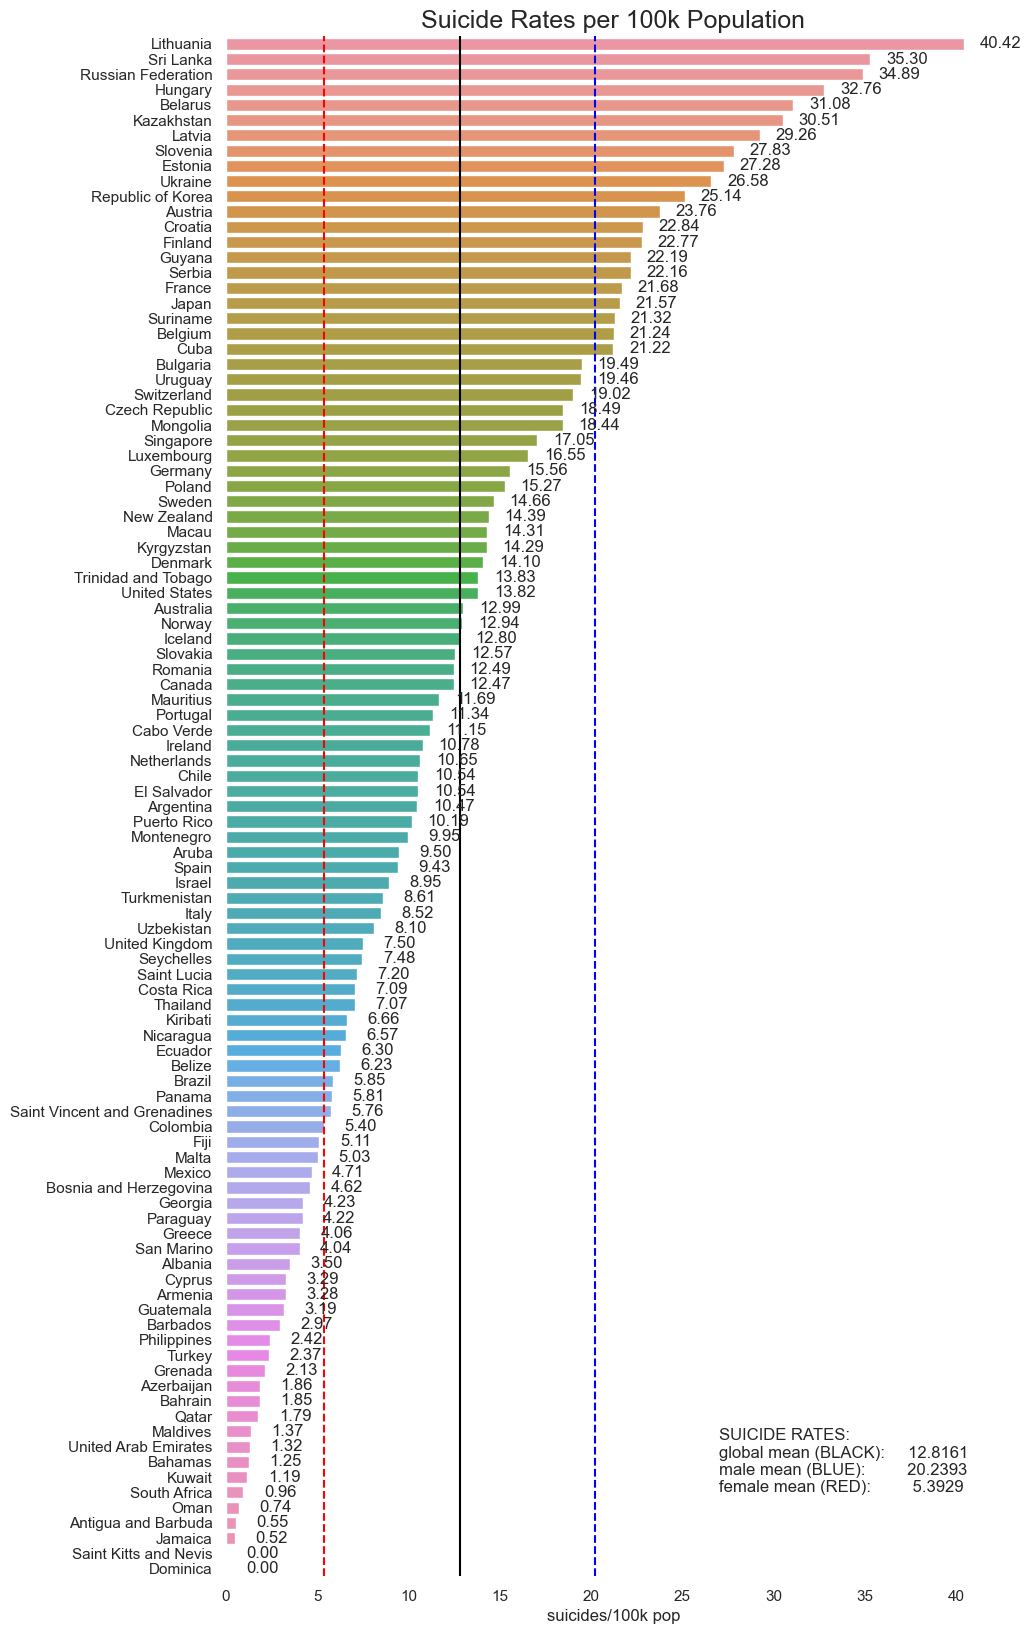

In [298]:

#  suicide rate average: overall, male, female
suicide_mean = sd['suicides/100k pop'].mean()
sr_m = sd['suicides/100k pop'][sd['sex'] == 'male'].mean()
sr_f = sd['suicides/100k pop'][sd['sex'] == 'female'].mean()

#  dataframe with suicide averages for each country
df_suicideRate = sd['suicides/100k pop'].groupby(sd['country']).mean().sort_values(ascending=False).reset_index()


#  plot suicide rates per country
plt.figure(figsize=(10,20))
ax = sns.barplot(data = df_suicideRate, x = 'suicides/100k pop', y='country')
plt.title('Suicide Rates per 100k Population', fontsize=18)

plt.axvline(x= suicide_mean, color = 'black')#, ls = '--')
plt.axvline(x= sr_m, color = 'blue', ls = '--')
plt.axvline(x= sr_f, color = 'red', ls = '--')
plt.text(27,95,'SUICIDE RATES:\nglobal mean (BLACK):  {:>10.4f}\nmale mean (BLUE): {:>15.4f}\nfemale mean (RED): {:>14.4f}'.format(suicide_mean, sr_m, sr_f))

plt.ylabel("")
plt.box(False)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width() +2, p.get_y()+.4), ha='center', va='center')

plt.show()

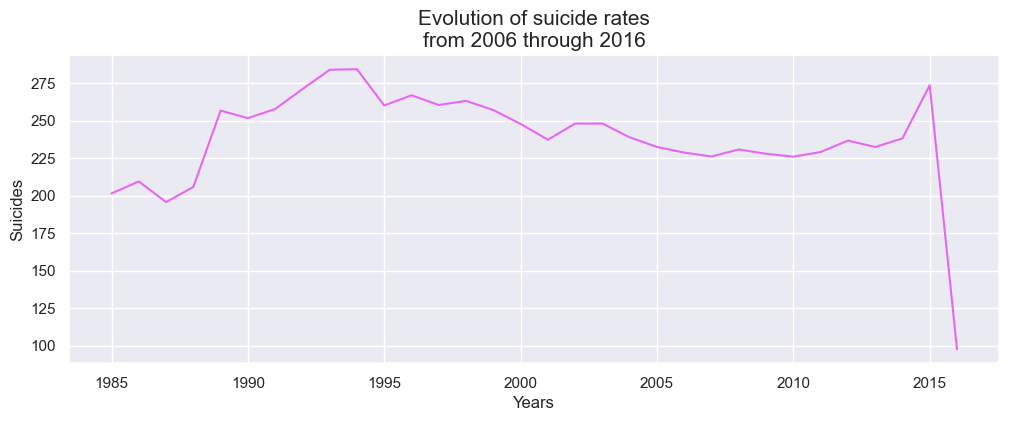

In [192]:
#Grouping our data by year
gp_year_data = sd.groupby('year', as_index=False).mean()

#Plotting the suicides rates by years 
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x='year', y='suicides_no', color=sns.husl_palette(6)[5], data=gp_year_data, ax=ax)
plt.xlabel('Years')
plt.ylabel('Suicides')
plt.title('Evolution of suicide rates\nfrom 2006 through 2016', size=15)
plt.show()

# 2016

In [23]:
sd_2016=sd[sd['year']==2016]
sd_2016

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1248,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,NaN,"10,546,135,160",3788,Silent
1249,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,"10,546,135,160",3788,Boomers
1250,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,NaN,"10,546,135,160",3788,Generation X
1251,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,NaN,"10,546,135,160",3788,Millenials
1252,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,NaN,"10,546,135,160",3788,Silent
...,...,...,...,...,...,...,...,...,...,...,...,...
25307,Thailand,2016,female,75+ years,69,1589015,4.34,Thailand2016,NaN,"411,755,164,833",6713,Silent
25308,Thailand,2016,female,55-74 years,222,6049756,3.67,Thailand2016,NaN,"411,755,164,833",6713,Boomers
25309,Thailand,2016,female,35-54 years,375,10629684,3.53,Thailand2016,NaN,"411,755,164,833",6713,Generation X
25310,Thailand,2016,female,25-34 years,116,4702656,2.47,Thailand2016,NaN,"411,755,164,833",6713,Millenials


In [68]:
sd_2016.describe(include=object)

,country,sex,age,country-year,gdp_for_year ($),generation
count,160,160,160,160,160,160
unique,16,2,5,16,16,4
top,Armenia,male,75+ years,Armenia2016,"10,546,135,160",Millenials
freq,10,80,32,10,10,64


In [165]:
# 1.  rearrange column name so "suicides/100k pop" is first
df_corr = sd_2016[['suicides_no', 'sex', 'age', 'population', 'HDI for year', 'gdp_per_capita ($)', 'generation', 'country']]

# 2.  encode with numerical values
df_corr['sex'] = df_corr['sex'].map({'female':0,'male':1})
df_corr['age'] = df_corr['age'].map({
        '5-14 years':0,'15-24 years':1,'25-34 years':2,
        '35-54 years':3,'55-74 years':4,'75+ years':5})
df_corr['generation'] = df_corr['generation'].map({
        'Generation Z':0,'Millenials':1,'Generation X':2,
        'Boomers':3,'Silent':4,'G.I. Generation':5})
df_corr['country'] = df_corr['country'].map({
        'Africa':0,'Asia':1,'Australia':2,'Central America':3,
        'Europe':4,'North America':5,'South America':6})

df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 1248 to 25311
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   suicides_no         160 non-null    int64  
 1   sex                 160 non-null    int64  
 2   age                 160 non-null    int64  
 3   population          160 non-null    int64  
 4   HDI for year        0 non-null      float64
 5   gdp_per_capita ($)  160 non-null    int64  
 6   generation          160 non-null    int64  
 7   country             0 non-null      float64
dtypes: float64(2), int64(6)
memory usage: 11.2 KB


C:\Users\bienail\AppData\Local\Temp\ipykernel_19588\2511374069.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bienail\AppData\Local\Temp\ipykernel_19588\2511374069.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bienail\AppData\Local\Temp\ipykernel_19588\2511374069.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [166]:
from sklearn.preprocessing import MinMaxScaler

df_norm = MinMaxScaler().fit_transform(df_corr)
df_corr = pd.DataFrame(df_norm, index = df_corr.index, columns = df_corr.columns)

C:\Users\bienail\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning:

All-NaN slice encountered

C:\Users\bienail\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning:

All-NaN slice encountered



# Population, sex, and age are siginifacnt factors in determing suicides rates

<AxesSubplot:title={'center':'Suicides Correlation'}>

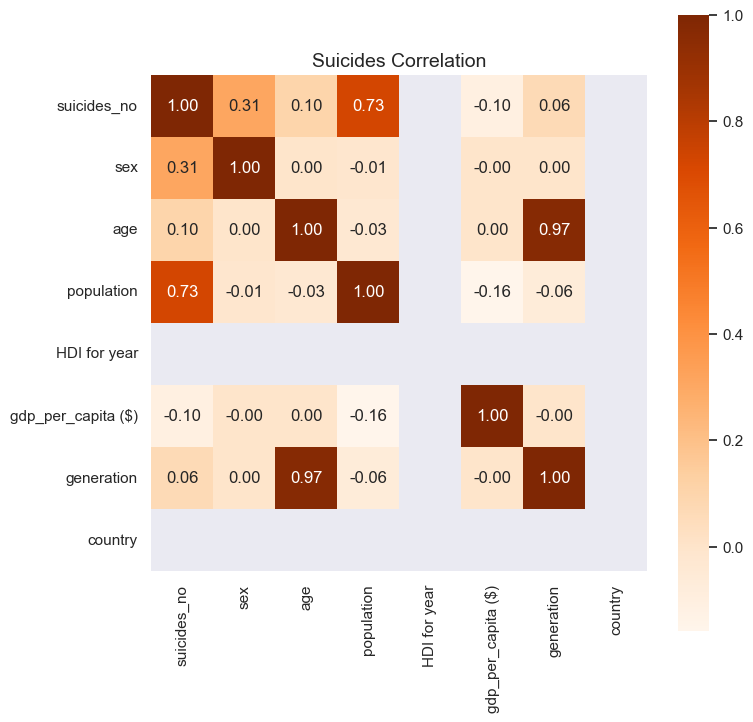

In [168]:
#  Correlations 
corr_2016 = df_corr.corr()

#  print correlation
corr_2016['suicides_no'].sort_values(ascending=False)

#  plot heatmap
plt.figure(figsize=(8,8))
plt.title('Suicides Correlation', fontsize=14)
sns.heatmap(corr_2016, annot=True, fmt='.2f', square=True, cmap = 'Oranges')

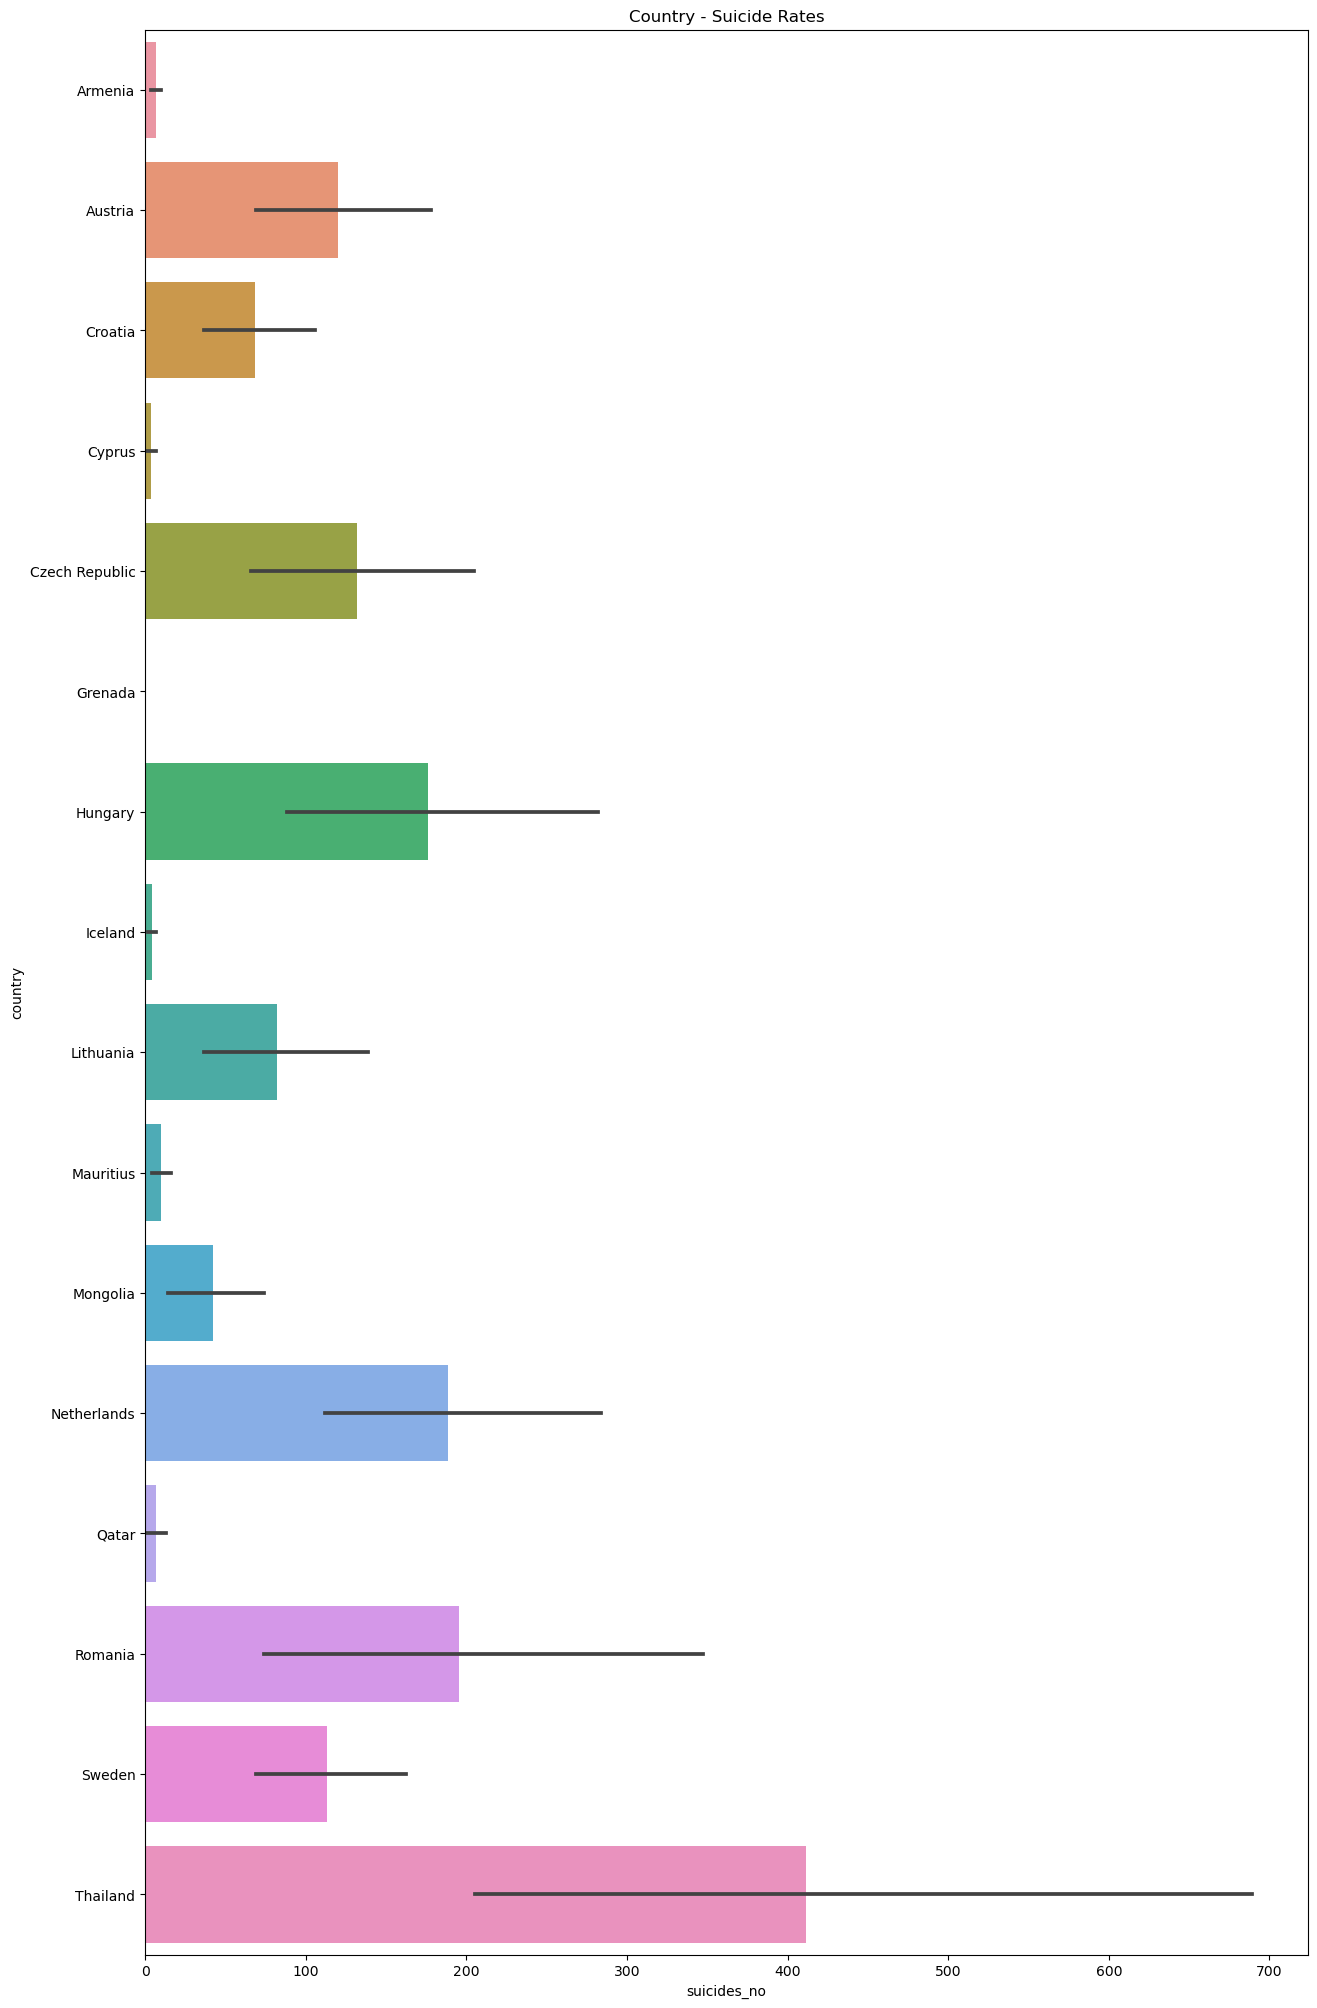

In [24]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicides_no", y = "country", data = sd_2016)
plt.title('Country - Suicide Rates')
plt.show()

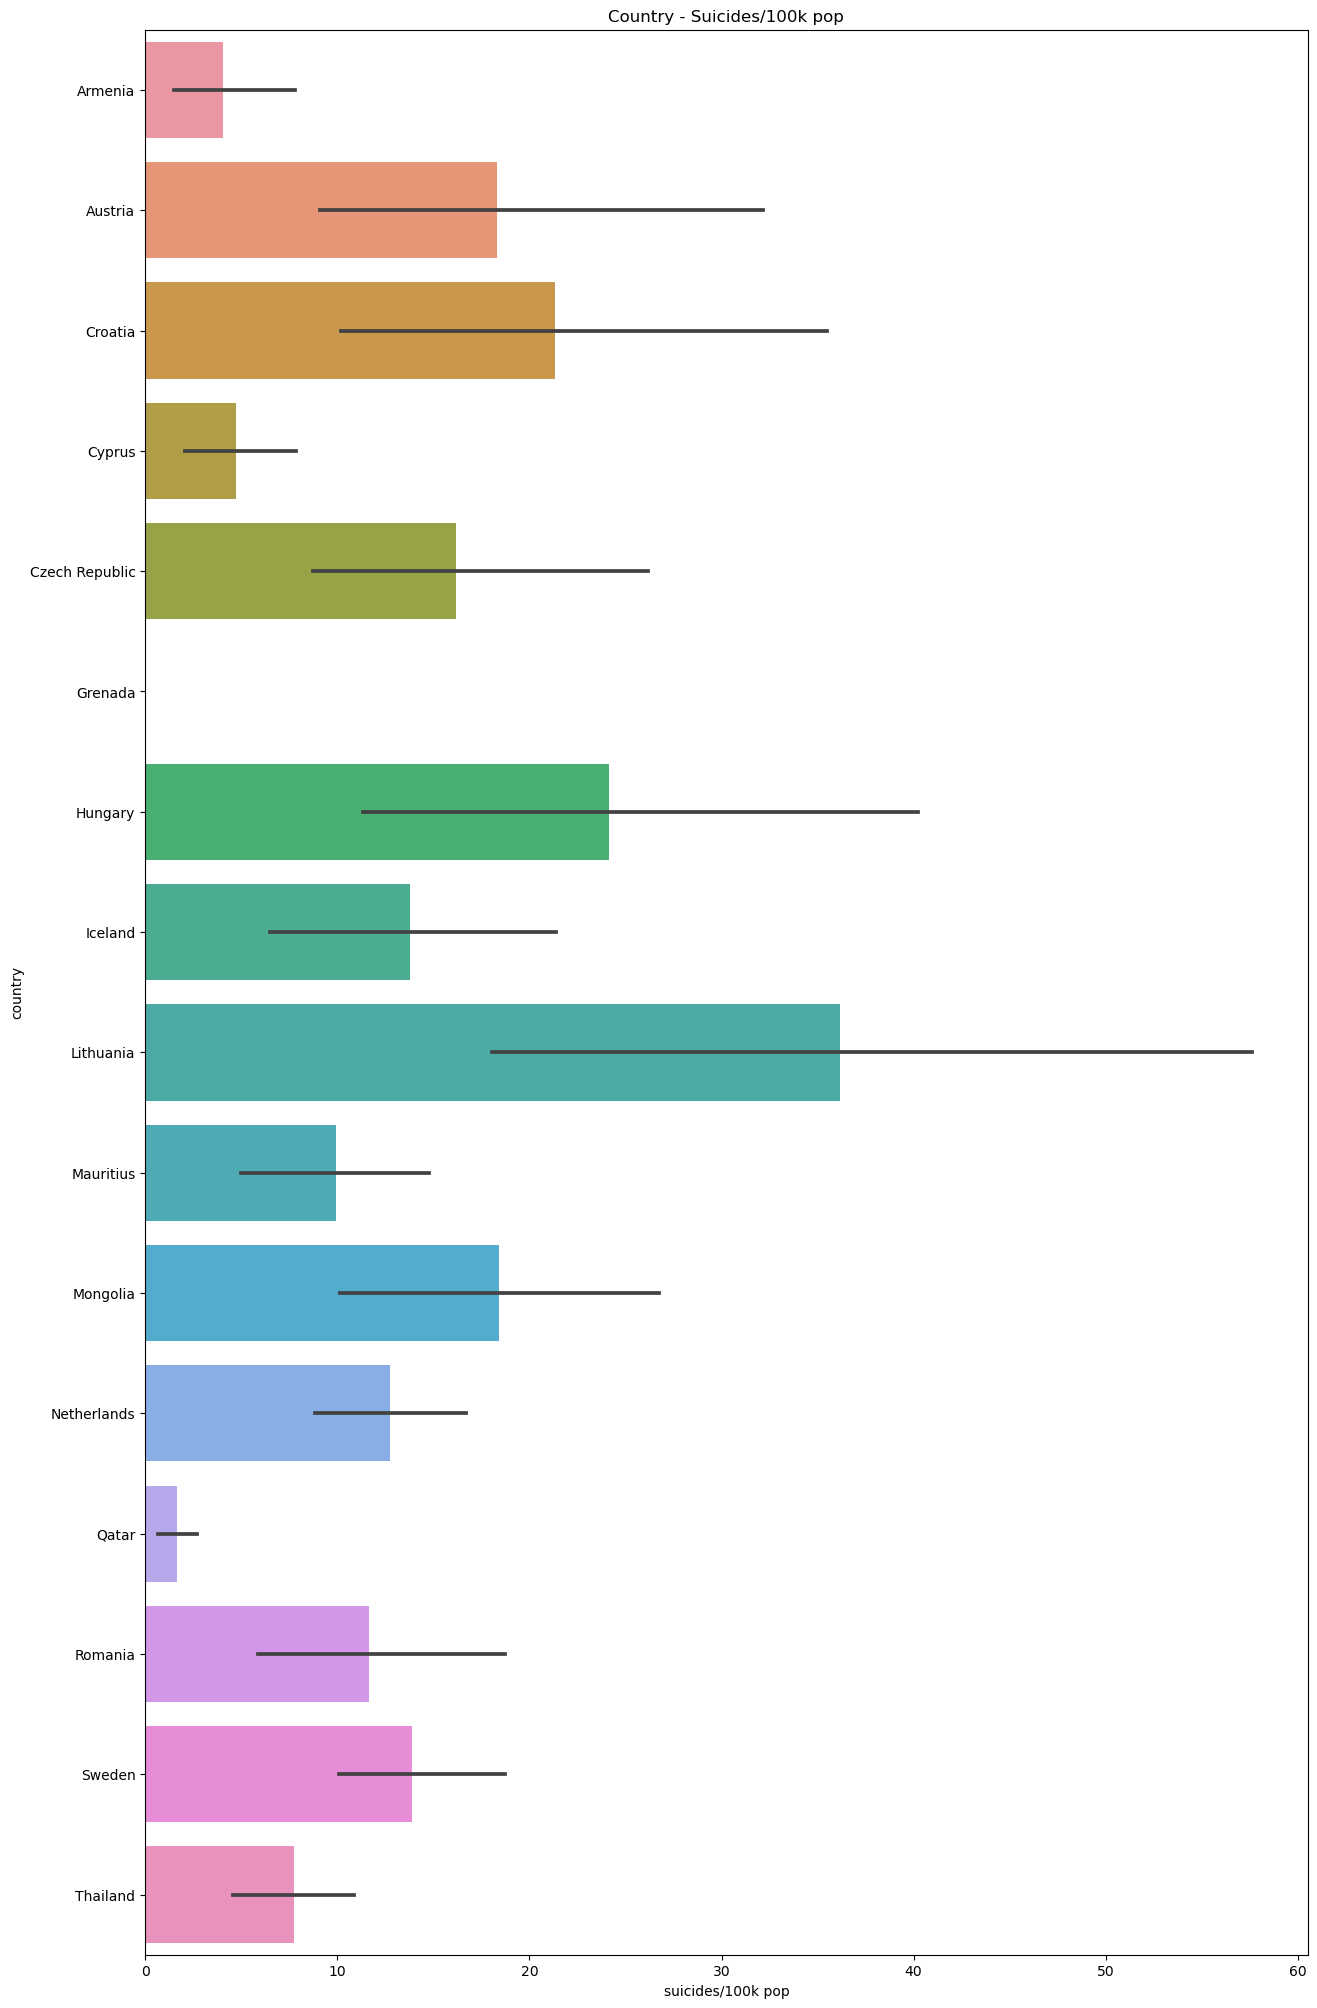

In [29]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicides/100k pop", y = "country", data = sd_2016)
plt.title('Country - Suicides/100k pop')
plt.show()

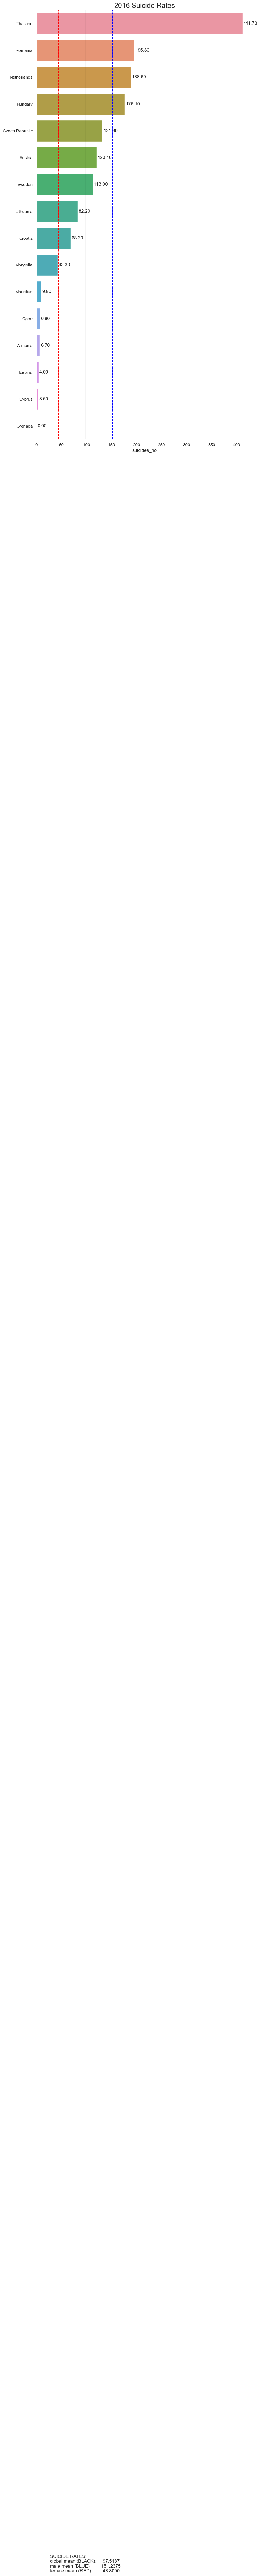

In [70]:

#  suicide rate average: overall, male, female
suicide_mean_2016 = sd_2016['suicides_no'].mean()
sr_m_2016 = sd_2016['suicides_no'][sd_2016['sex'] == 'male'].mean()
sr_f_2016 = sd_2016['suicides_no'][sd_2016['sex'] == 'female'].mean()

#  dataframe with suicide averages for each country
df_suicideRate_2016 = sd_2016['suicides_no'].groupby(sd_2016['country']).mean().sort_values(ascending=False).reset_index()


#  plot suicide rates per country
plt.figure(figsize=(10,20))
ax = sns.barplot(data = df_suicideRate_2016, x = 'suicides_no', y='country')
plt.title('2016 Suicide Rates', fontsize=18)

plt.axvline(x= suicide_mean_2016, color = 'black')#, ls = '--')
plt.axvline(x= sr_m_2016 , color = 'blue', ls = '--')
plt.axvline(x= sr_f_2016, color = 'red', ls = '--')
plt.text(27,95,'SUICIDE RATES:\nglobal mean (BLACK):  {:>10.4f}\nmale mean (BLUE): {:>15.4f}\nfemale mean (RED): {:>14.4f}'.format(suicide_mean_2016, sr_m_2016, sr_f_2016))

plt.ylabel("")
plt.box(False)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width() +2, p.get_y()+.4), ha='left', va='center')

plt.show()

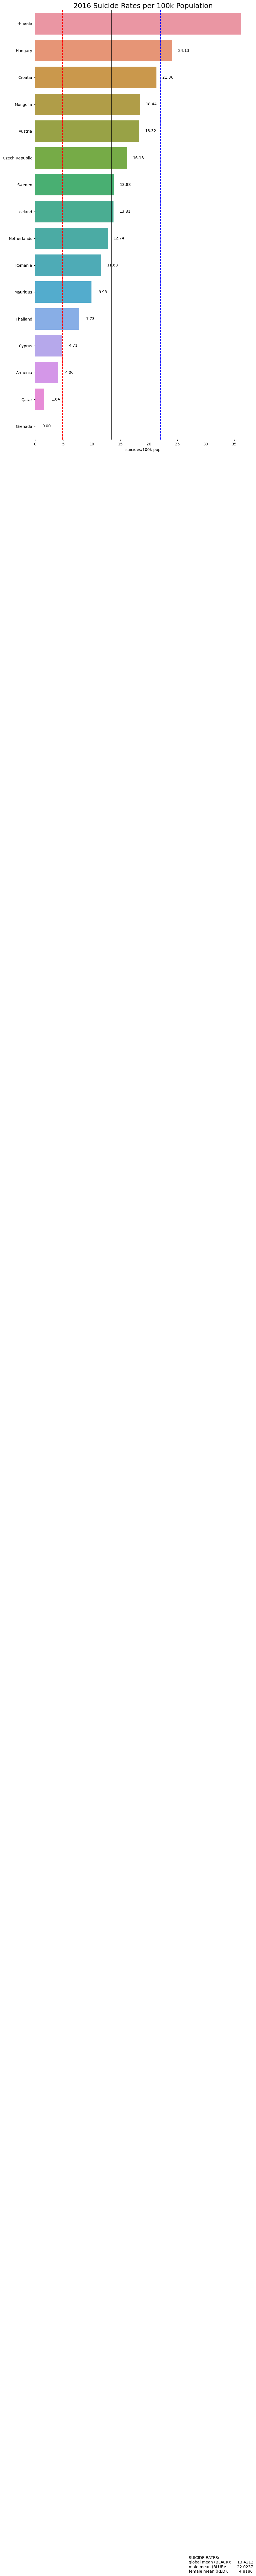

In [33]:

#  suicide rate average: overall, male, female
suicide_mean_2016 = sd_2016['suicides/100k pop'].mean()
sr_m_2016 = sd_2016['suicides/100k pop'][sd_2016['sex'] == 'male'].mean()
sr_f_2016 = sd_2016['suicides/100k pop'][sd_2016['sex'] == 'female'].mean()

#  dataframe with suicide averages for each country
df_suicideRate_2016 = sd_2016['suicides/100k pop'].groupby(sd['country']).mean().sort_values(ascending=False).reset_index()


#  plot suicide rates per country
plt.figure(figsize=(10,20))
ax = sns.barplot(data = df_suicideRate_2016, x = 'suicides/100k pop', y='country')
plt.title('2016 Suicide Rates per 100k Population', fontsize=18)

plt.axvline(x= suicide_mean_2016, color = 'black')#, ls = '--')
plt.axvline(x= sr_m_2016, color = 'blue', ls = '--')
plt.axvline(x= sr_f_2016, color = 'red', ls = '--')
plt.text(27,95,'SUICIDE RATES:\nglobal mean (BLACK):  {:>10.4f}\nmale mean (BLUE): {:>15.4f}\nfemale mean (RED): {:>14.4f}'.format(suicide_mean_2016, sr_m_2016, sr_f_2016))

plt.ylabel("")
plt.box(False)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width() +2, p.get_y()+.4), ha='center', va='center')

plt.show()

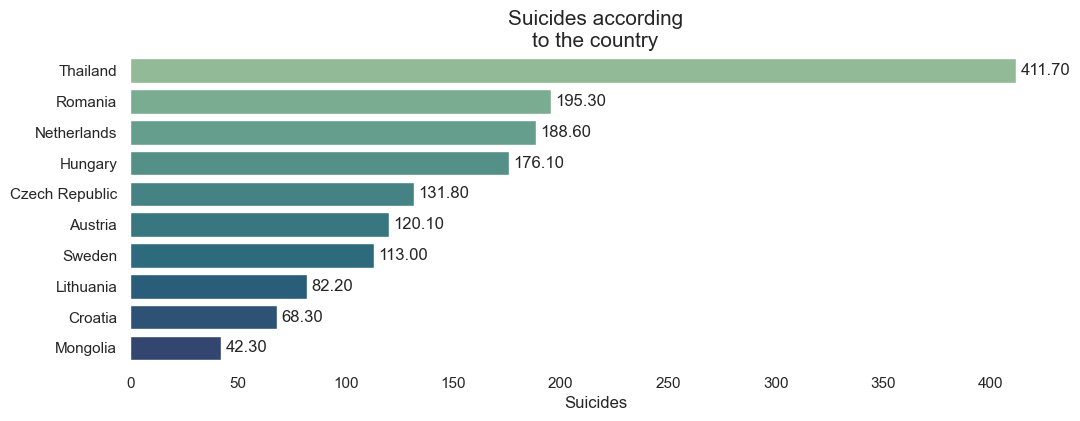

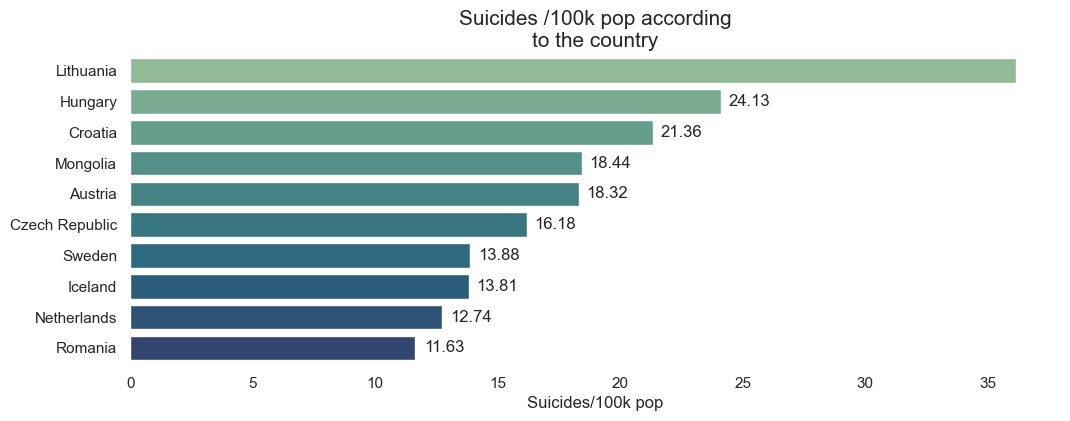

In [187]:
#Grouping the data by country
gp_cnt_data = sd_2016.groupby('country', as_index=False).mean()
top_ten = gp_cnt_data.nlargest(10, 'suicides_no').sort_values('suicides_no', ascending=False)

#Plotting the number of suicides according to the countries 
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x='suicides_no', y='country', palette='crest', data=top_ten, ax=ax)
plt.xlabel('Suicides')
plt.ylabel('Country')
plt.title('Suicides according\nto the country', size=15)
ax.ticklabel_format(style='plain', axis='x')


plt.ylabel("")
plt.box(False)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width() +2, p.get_y()+.4), ha='left', va='center')

plt.show()

#Grouping the data by country
gp_cnt_data = sd_2016.groupby('country', as_index=False).mean()
top_ten = gp_cnt_data.nlargest(10, 'suicides/100k pop').sort_values('suicides/100k pop', ascending=False)

#Plotting the number of suicides according to the countries 
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x='suicides/100k pop', y='country', palette='crest', data=top_ten, ax=ax)
plt.xlabel('Suicides/100k pop')
plt.ylabel('Country')
plt.title('Suicides /100k pop according\nto the country', size=15)
ax.ticklabel_format(style='plain', axis='x')

plt.ylabel("")
plt.box(False)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width() +2, p.get_y()+.4), ha='right', va='center')

plt.show()

# male

In [95]:
sd_2016_male=sd_2016[sd_2016['sex']=='male']
sd_2016_male

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1248,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,NaN,"10,546,135,160",3788,Silent
1249,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,"10,546,135,160",3788,Boomers
1250,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,NaN,"10,546,135,160",3788,Generation X
1251,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,NaN,"10,546,135,160",3788,Millenials
1254,Armenia,2016,male,25-34 years,4,255665,1.56,Armenia2016,NaN,"10,546,135,160",3788,Millenials
...,...,...,...,...,...,...,...,...,...,...,...,...
25302,Thailand,2016,male,55-74 years,734,5203957,14.10,Thailand2016,NaN,"411,755,164,833",6713,Boomers
25303,Thailand,2016,male,35-54 years,1421,10084647,14.09,Thailand2016,NaN,"411,755,164,833",6713,Generation X
25304,Thailand,2016,male,75+ years,152,1124052,13.52,Thailand2016,NaN,"411,755,164,833",6713,Silent
25305,Thailand,2016,male,25-34 years,646,4796355,13.47,Thailand2016,NaN,"411,755,164,833",6713,Millenials


In [96]:
sd_2016_male.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,80.0,80.000000,8.000000e+01,80.000000,0.0,80.000000
mean,2016.0,151.237500,8.091675e+05,22.023750,NaN,25665.125000
std,0.0,224.441543,1.468071e+06,20.410865,NaN,21311.061399
min,2016.0,0.000000,1.312000e+03,0.000000,NaN,3788.000000
25%,2016.0,11.750000,9.420425e+04,8.540000,NaN,10432.500000
50%,2016.0,78.000000,3.006085e+05,18.480000,NaN,14595.000000
75%,2016.0,193.250000,9.622202e+05,26.792500,NaN,47259.000000
max,2016.0,1421.000000,1.008465e+07,96.980000,NaN,64708.000000


In [97]:
sd_2016_male.describe(include=object)

,country,sex,age,country-year,gdp_for_year ($),generation
count,80,80,80,80,80,80
unique,16,1,5,16,16,4
top,Armenia,male,75+ years,Armenia2016,"10,546,135,160",Millenials
freq,5,80,16,5,5,32


In [98]:
sd_2016_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 1248 to 25306
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             80 non-null     object 
 1   year                80 non-null     int64  
 2   sex                 80 non-null     object 
 3   age                 80 non-null     object 
 4   suicides_no         80 non-null     int64  
 5   population          80 non-null     int64  
 6   suicides/100k pop   80 non-null     float64
 7   country-year        80 non-null     object 
 8   HDI for year        0 non-null      float64
 9    gdp_for_year ($)   80 non-null     object 
 10  gdp_per_capita ($)  80 non-null     int64  
 11  generation          80 non-null     object 
dtypes: float64(2), int64(4), object(6)
memory usage: 8.1+ KB


# Female

In [99]:
sd_2016_female=sd_2016[sd_2016['sex']=='female']
sd_2016_female

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1252,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,NaN,"10,546,135,160",3788,Silent
1253,Armenia,2016,female,55-74 years,6,308349,1.95,Armenia2016,NaN,"10,546,135,160",3788,Boomers
1255,Armenia,2016,female,35-54 years,3,408109,0.74,Armenia2016,NaN,"10,546,135,160",3788,Generation X
1256,Armenia,2016,female,25-34 years,2,277452,0.72,Armenia2016,NaN,"10,546,135,160",3788,Millenials
1257,Armenia,2016,female,15-24 years,1,195422,0.51,Armenia2016,NaN,"10,546,135,160",3788,Millenials
...,...,...,...,...,...,...,...,...,...,...,...,...
25307,Thailand,2016,female,75+ years,69,1589015,4.34,Thailand2016,NaN,"411,755,164,833",6713,Silent
25308,Thailand,2016,female,55-74 years,222,6049756,3.67,Thailand2016,NaN,"411,755,164,833",6713,Boomers
25309,Thailand,2016,female,35-54 years,375,10629684,3.53,Thailand2016,NaN,"411,755,164,833",6713,Generation X
25310,Thailand,2016,female,25-34 years,116,4702656,2.47,Thailand2016,NaN,"411,755,164,833",6713,Millenials


# Pie Chart

In [188]:
fig = px.pie(sd_2016_female, values='suicides_no',
             names='age', title='Suicides of Females age groups in 2016')
fig.show()

fig = px.pie(sd_2016_male, values='suicides_no',
             names='age', title='Suicides of Males age groups  in 2016')
fig.show()

In [172]:
fig = px.pie(sd_2016_female, values='population',
             names='age', title='Population of Females with age groups in 2016')
fig.show()

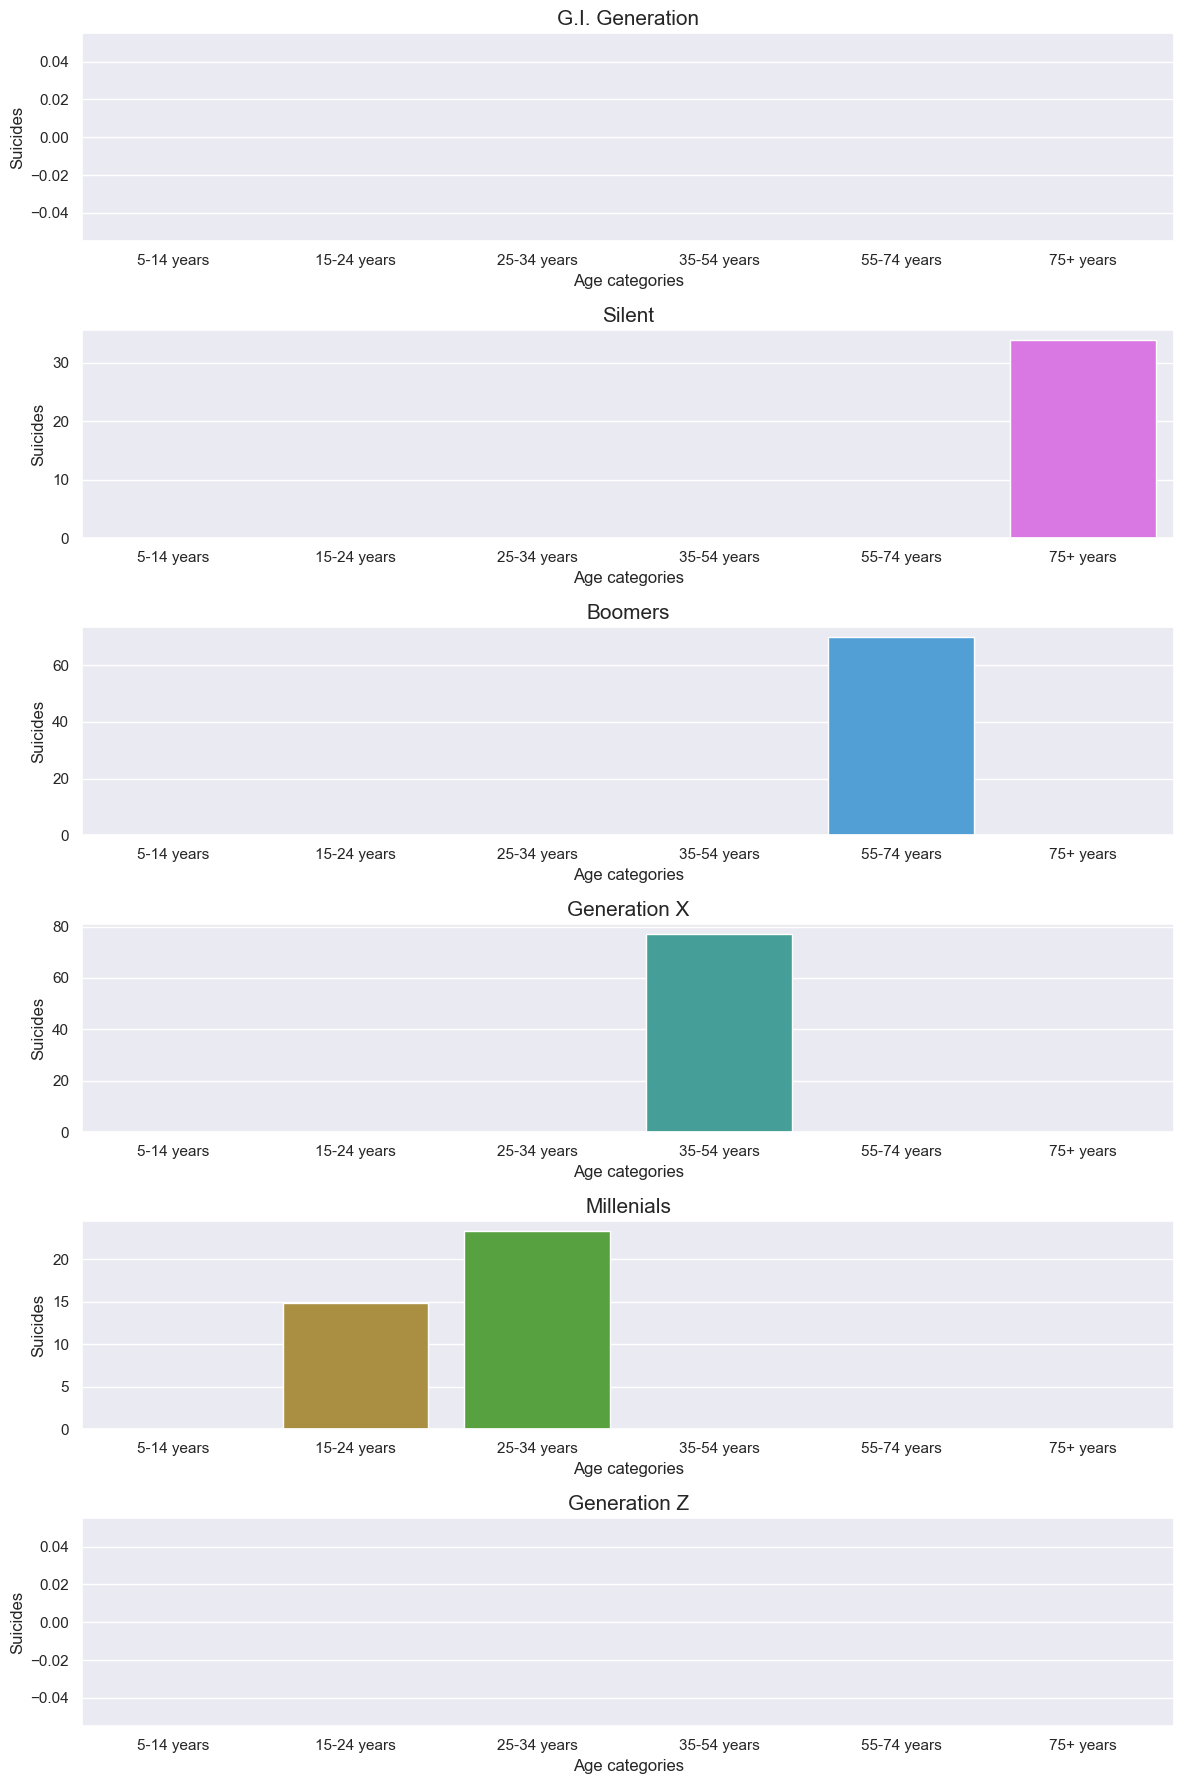

In [103]:
#Grouping our data by generation and age 
group_gen_age = sd_2016_female.groupby(['generation', 'age'], as_index=False).mean()

#Making a list containing all the gens 
gens = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']

#Creating the axis of the plots
plt.figure(figsize=(12,18))
ax1 = plt.subplot2grid((6,1),(0,0))
ax2 = plt.subplot2grid((6,1),(1,0))
ax3 = plt.subplot2grid((6,1),(2,0))
ax4 = plt.subplot2grid((6,1),(3,0))
ax5 = plt.subplot2grid((6,1),(4,0))
ax6 = plt.subplot2grid((6,1),(5,0))

#Making a list containing all the axes
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

#Making a for loop to plot the needed plots 
for gen, ax in zip(gens, axes):
    sns.barplot(x='age', y='suicides_no', palette='husl', 
                data=group_gen_age[group_gen_age['generation'] == gen],
                ax=ax, order=['5-14 years', '15-24 years', '25-34 years', '35-54 years', 
                          '55-74 years', '75+ years'])
    ax.set_xlabel('Age categories')
    ax.set_ylabel('Suicides')
    ax.set_title(gen, size=15)
plt.tight_layout()

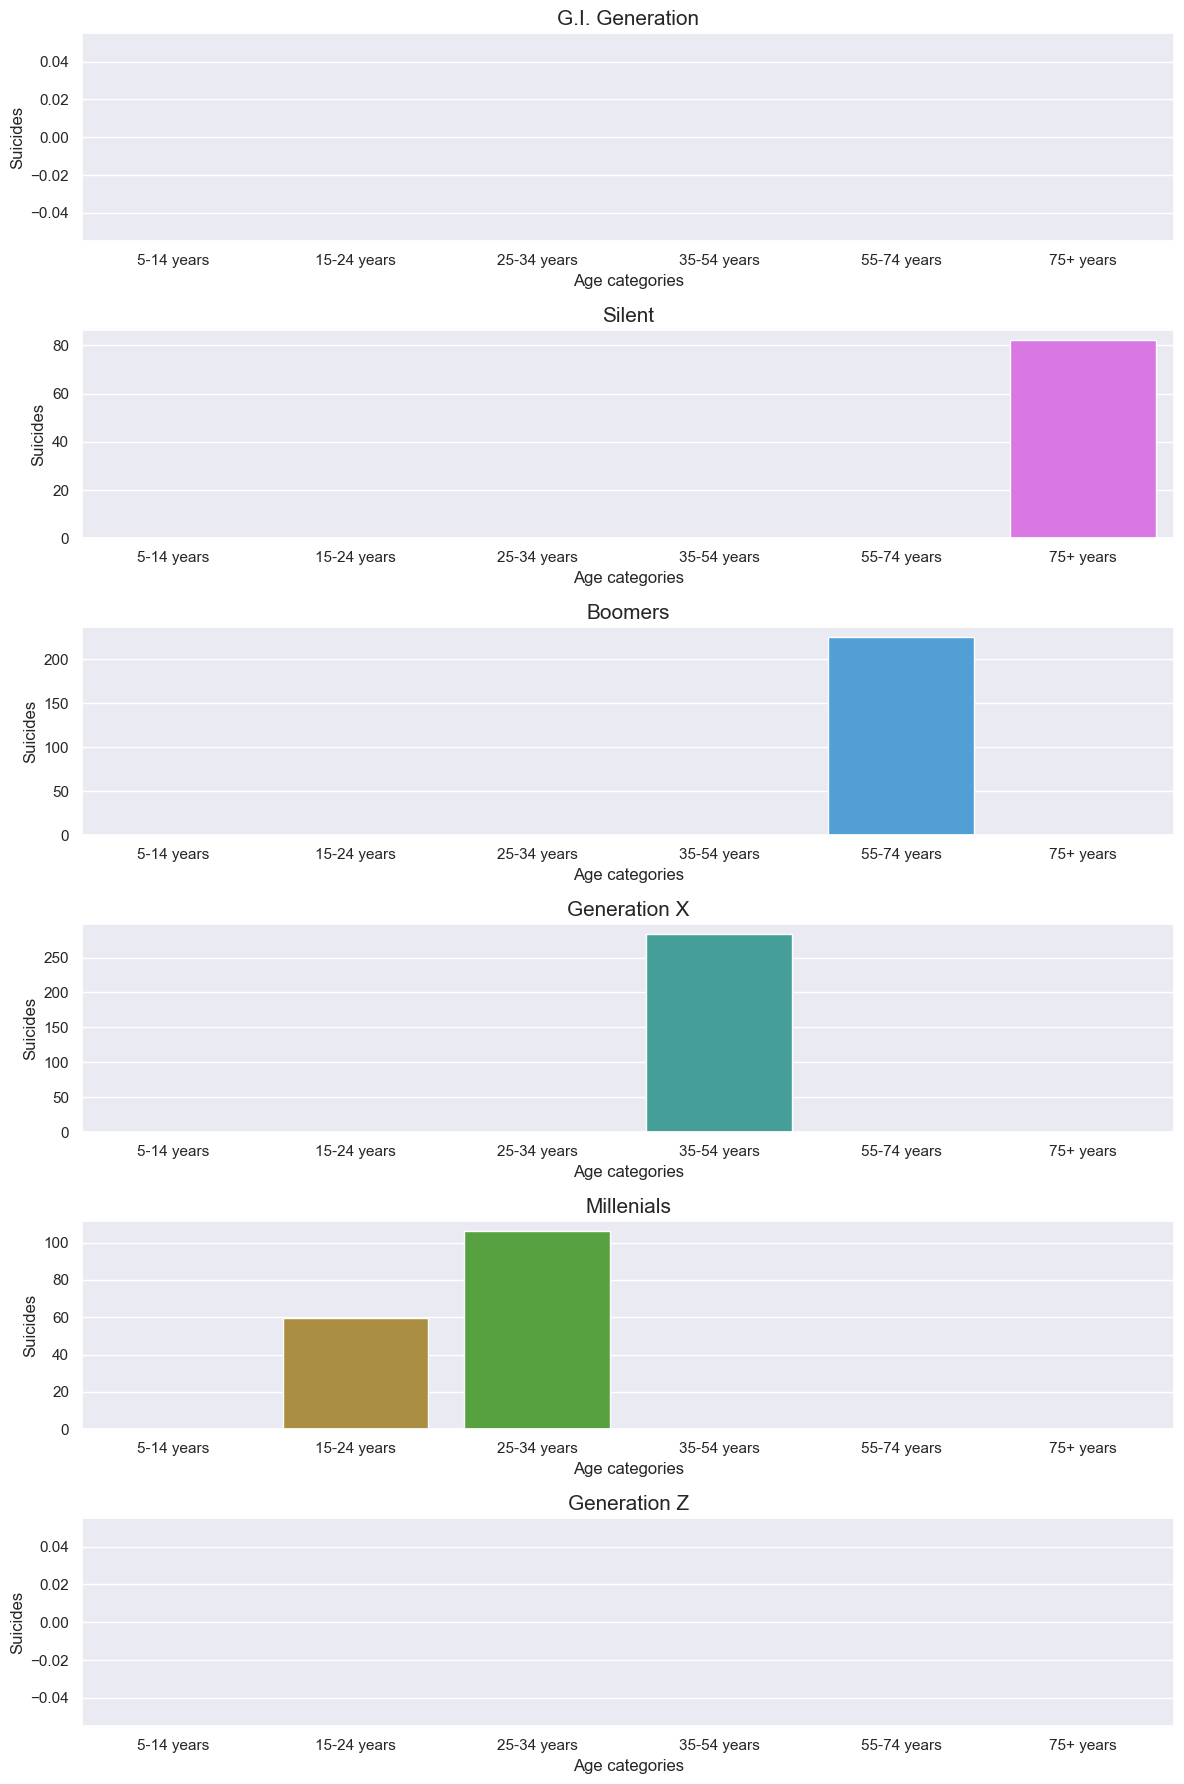

In [104]:
#Grouping our data by generation and age 
group_gen_age = sd_2016_male.groupby(['generation', 'age'], as_index=False).mean()

#Making a list containing all the gens 
gens = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']

#Creating the axis of the plots
plt.figure(figsize=(12,18))
ax1 = plt.subplot2grid((6,1),(0,0))
ax2 = plt.subplot2grid((6,1),(1,0))
ax3 = plt.subplot2grid((6,1),(2,0))
ax4 = plt.subplot2grid((6,1),(3,0))
ax5 = plt.subplot2grid((6,1),(4,0))
ax6 = plt.subplot2grid((6,1),(5,0))

#Making a list containing all the axes
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

#Making a for loop to plot the needed plots 
for gen, ax in zip(gens, axes):
    sns.barplot(x='age', y='suicides_no', palette='husl', 
                data=group_gen_age[group_gen_age['generation'] == gen],
                ax=ax, order=['5-14 years', '15-24 years', '25-34 years', '35-54 years', 
                          '55-74 years', '75+ years'])
    ax.set_xlabel('Age categories')
    ax.set_ylabel('Suicides')
    ax.set_title(gen, size=15)
plt.tight_layout()

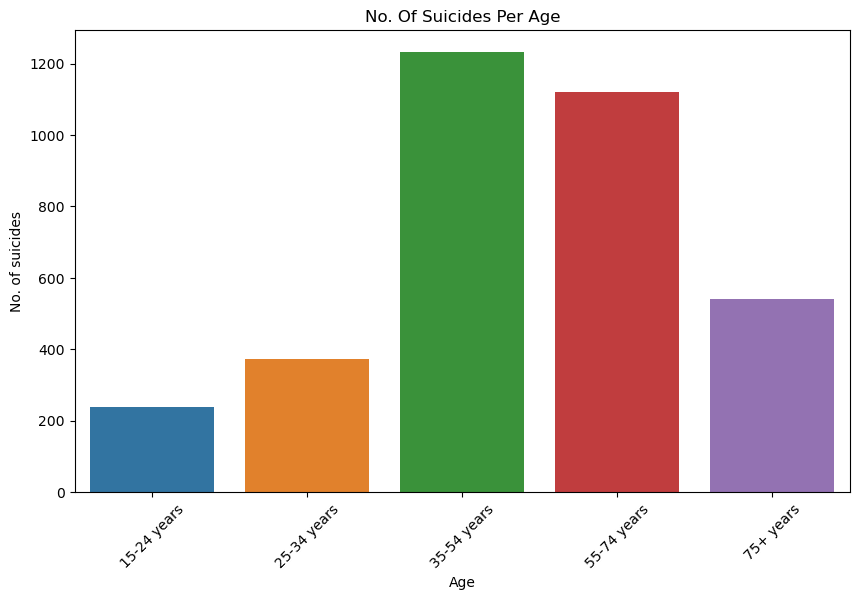

In [43]:
# Set Variables.
age_sui = sd_2016_female.pivot_table('suicides_no', index='age', aggfunc='sum')
x = age_sui.index.values
y = age_sui.values
y = y.reshape(5,)

# Ploting
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=x, y=y)
ax.set(title='No. Of Suicides Per Age', ylabel='No. of suicides', xlabel='Age');
plt.xticks(rotation=45);
plt.show()

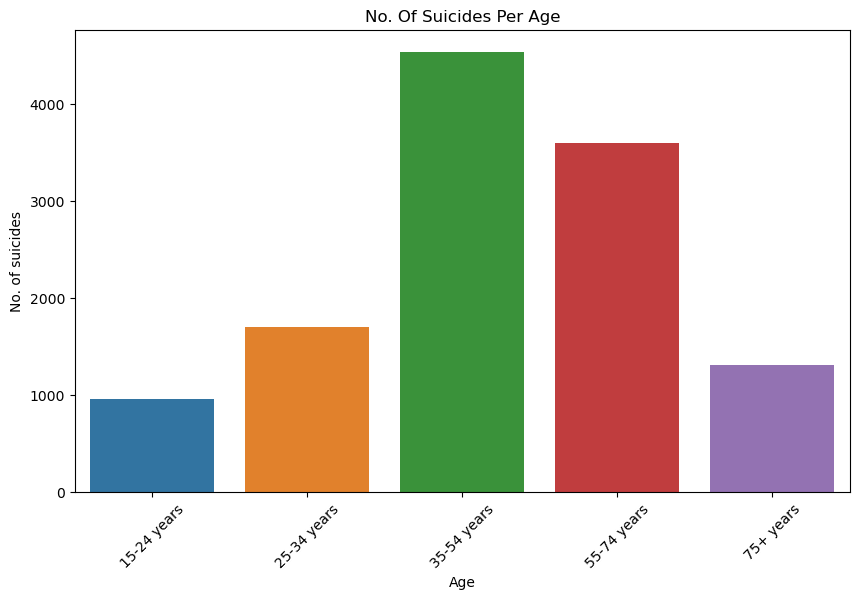

In [44]:
# Set Variables.
age_2016_male = sd_2016_male.pivot_table('suicides_no', index='age', aggfunc='sum')
x = age_2016_male.index.values
y = age_2016_male.values
y = y.reshape(5,)

# Ploting
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=x, y=y)
ax.set(title='No. Of Suicides Per Age', ylabel='No. of suicides', xlabel='Age');
plt.xticks(rotation=45);
plt.show()

In [189]:
fig = px.histogram(sd_2016, x="suicides_no", color="sex")
fig.show()

fig = px.histogram(sd_2016, x="suicides/100k pop", color="sex")
fig.show()

In [50]:

fig = px.parallel_categories(sd_2016)

fig.show()

# Multiple linear regression

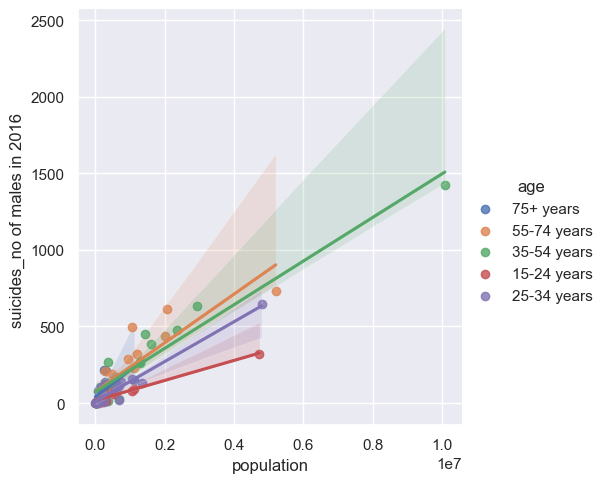

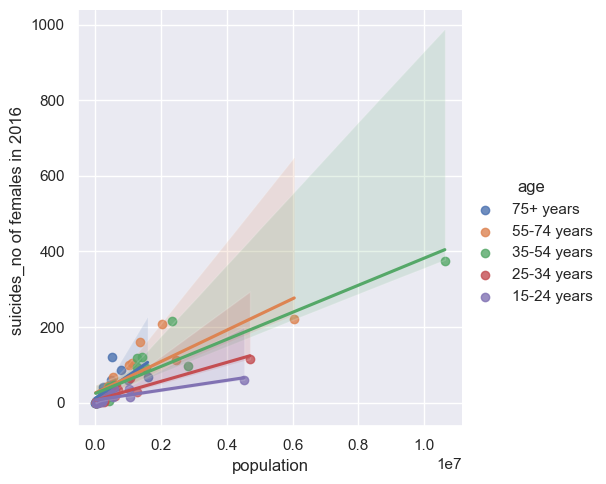

In [191]:
import seaborn as sns
sns.set_theme()



lmsd_2016_male = sns.lmplot(
    data=sd_2016_male,
    x="population", y="suicides_no", hue="age",
    height=5
)

# Use more informative axis labels than are provided by default

lmsd_2016_male.set_axis_labels("population", "suicides_no of males in 2016 ")




lmsd_2016_female = sns.lmplot(
    data=sd_2016_female,
    x="population", y="suicides_no", hue="age",
    height=5
)

# Use more informative axis labels than are provided by default
lmsd_2016_female.set_axis_labels("population", "suicides_no of females in 2016 ")


# Decade

In [53]:
sd_decade=sd[sd['year']>=2006]
sd_decade

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
204,Albania,2006,female,15-24 years,0,283138,0.00,Albania2006,NaN,"8,992,642,349",3235,Millenials
205,Albania,2006,female,25-34 years,0,186391,0.00,Albania2006,NaN,"8,992,642,349",3235,Generation X
206,Albania,2006,female,35-54 years,0,388746,0.00,Albania2006,NaN,"8,992,642,349",3235,Boomers
207,Albania,2006,female,5-14 years,0,267316,0.00,Albania2006,NaN,"8,992,642,349",3235,Millenials
208,Albania,2006,female,55-74 years,0,215907,0.00,Albania2006,NaN,"8,992,642,349",3235,Silent
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [184]:
fig = px.pie(sd_decade, values='suicides_no', 
             names='age',
             hole = 0.5, title='Suicide Rates from 2006-2016')
fig.show()

fig = px.pie(sd_decade, values='suicides/100k pop', 
             names='age',
             hole = 0.5, title='Suicides/100k pop Rates from 2006-2016')
fig.show()

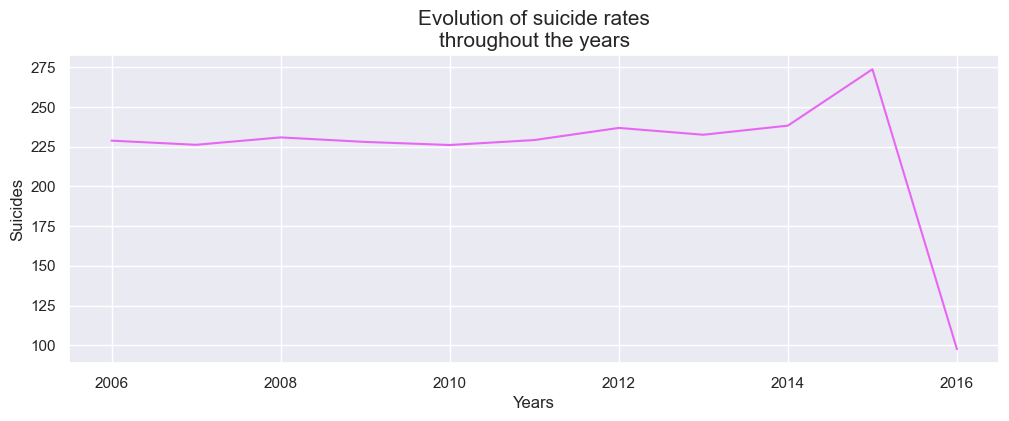

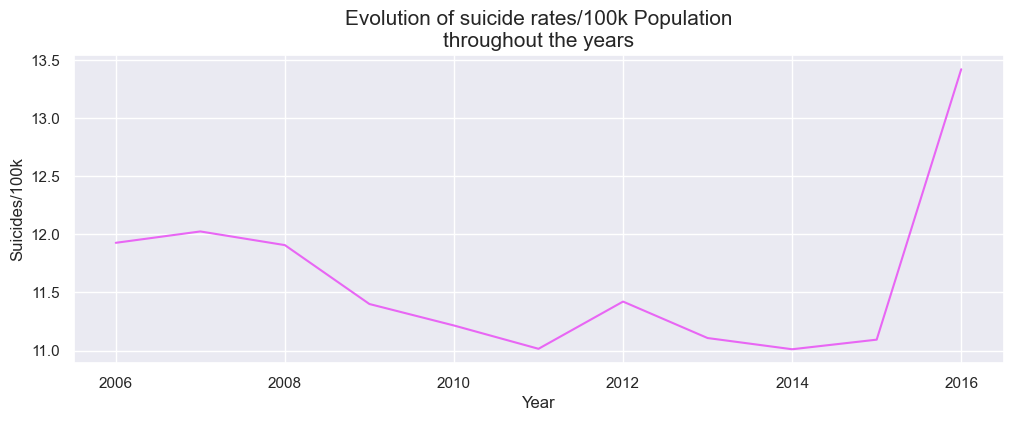

In [185]:
#Grouping our data by year
gp_year_data = sd_decade.groupby('year', as_index=False).mean()

#Plotting the suicides rates by years 
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x='year', y='suicides_no', color=sns.husl_palette(6)[5], data=gp_year_data, ax=ax)
plt.xlabel('Years')
plt.ylabel('Suicides')
plt.title('Evolution of suicide rates\nthroughout the years', size=15)
plt.show()
#Grouping our data by year
gp_year_data = sd_decade.groupby('year', as_index=False).mean()

#Plotting the suicides rates by years 
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x='year', y='suicides/100k pop', color=sns.husl_palette(6)[5], data=gp_year_data, ax=ax)
plt.xlabel('Year')
plt.ylabel('Suicides/100k')
plt.title('Evolution of suicide rates/100k Population\nthroughout the years', size=15)
plt.show()

# 2006-2016 top decades

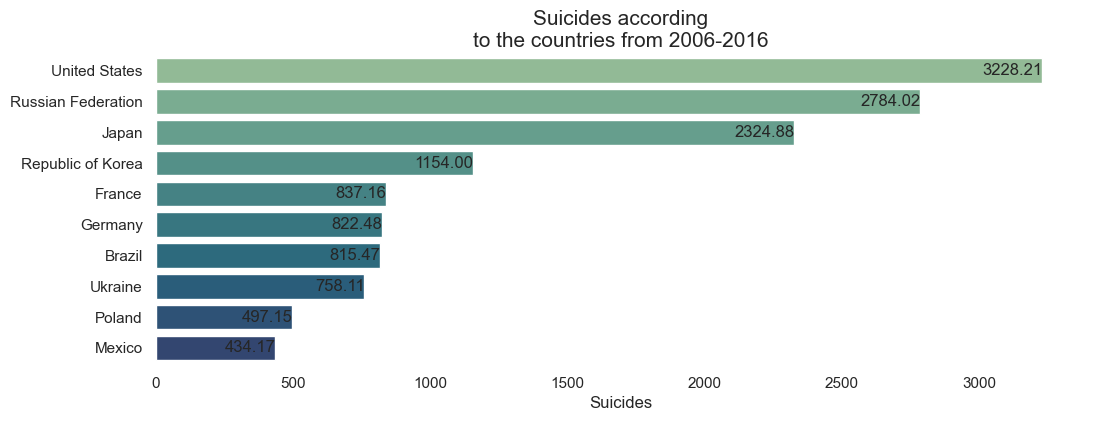

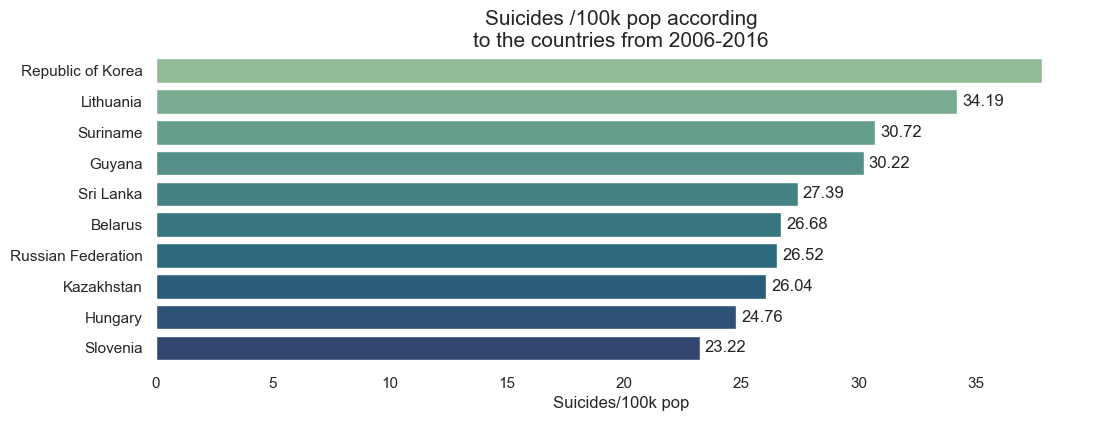

In [194]:
#Grouping the data by country
gp_cnt_data = sd_decade.groupby('country', as_index=False).mean()
top_ten = gp_cnt_data.nlargest(10, 'suicides_no').sort_values('suicides_no', ascending=False)

#Plotting the number of suicides according to the countries 
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x='suicides_no', y='country', palette='crest', data=top_ten, ax=ax)
plt.xlabel('Suicides')
plt.ylabel('Country')
plt.title('Suicides according\nto the countries from 2006-2016', size=15)
ax.ticklabel_format(style='plain', axis='x')


plt.ylabel("")
plt.box(False)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width() +2, p.get_y()+.4), ha='right', va='center')

plt.show()

#Grouping the data by country
gp_cnt_data = sd_decade.groupby('country', as_index=False).mean()
top_ten = gp_cnt_data.nlargest(10, 'suicides/100k pop').sort_values('suicides/100k pop', ascending=False)

#Plotting the number of suicides according to the countries 
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x='suicides/100k pop', y='country', palette='crest', data=top_ten, ax=ax)
plt.xlabel('Suicides/100k pop')
plt.ylabel('Country')
plt.title('Suicides /100k pop according\nto the countries from 2006-2016', size=15)
ax.ticklabel_format(style='plain', axis='x')

plt.ylabel("")
plt.box(False)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width() +2, p.get_y()+.4), ha='right', va='center')

plt.show()

# Model and Predictions

In [230]:
#Selecting the dependent and independent features
X = sd_decade[['country', 'sex', 'population', 'age', 'generation']]
y = sd_decade['suicides/100k pop']

In [231]:
#Transforming the categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [234]:
sc = StandardScaler()

In [235]:
X[['population']] = sc.fit_transform(X[['population']])

In [236]:
#Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [237]:
#Initializing our Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [238]:
#Predicting the test values
lr_y_pred = lr.predict(X_test)

C:\Users\bienail\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\bienail\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



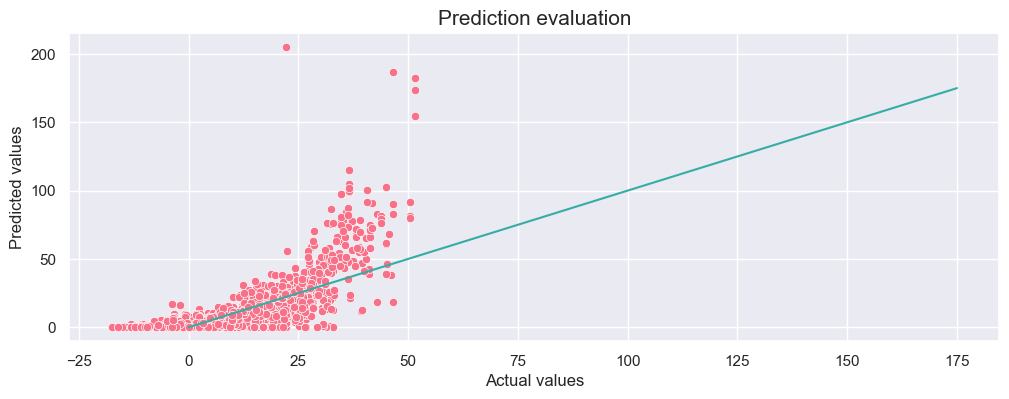

In [240]:
#Plotting the results
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(lr_y_pred, y_test, ax=ax, color=sns.husl_palette(10)[0])
sns.lineplot([0, 175], [0, 175], color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation', size=15)
plt.show()

# Decision Tree Regressor

In [245]:
#Initializing our Decision Tree
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [249]:
#Predicting the test values
dtree_y_pred = dtree.predict(X_test)

C:\Users\bienail\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\bienail\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



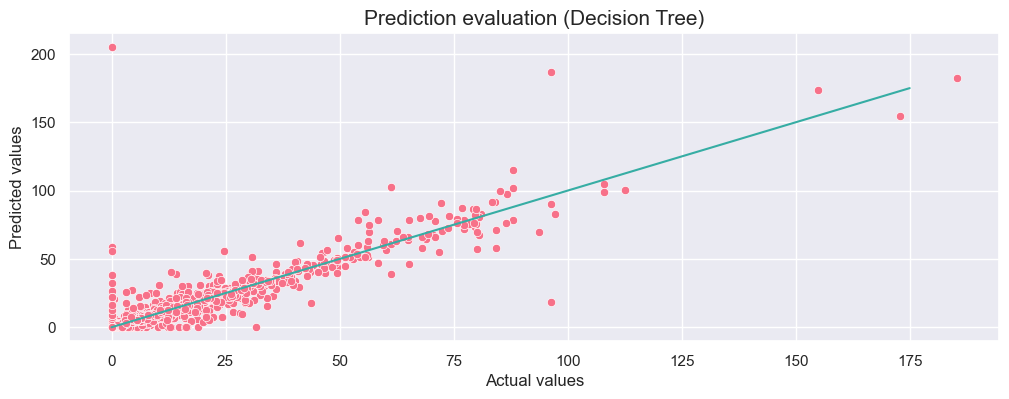

In [250]:
#Plotting the results
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(dtree_y_pred, y_test, ax=ax, color=sns.husl_palette(10)[0])
sns.lineplot([0, 175], [0, 175], color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Decision Tree)', size=15)
plt.show()

# PowerBi

In [107]:
from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication

import pandas as pd

In [108]:
device_auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code AH4H3W966 to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


In [111]:
bi = pd.read_csv('suicide.csv')

In [112]:
# Create a Power BI report from your data
PBI_visualize = QuickVisualize(get_dataset_config(sd), auth=device_auth)


In [113]:
# Render the new report
PBI_visualize

QuickVisualize()